#  FIN:9160 Final Project | Predicting Moving Direction of Dow 30 Stocks Using Sentiment Scores of News

Spring 2022 | Instructor: Qihang Lin and Tong Yao

## Data Preparation

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
import pandas as pd
import ast
from datetime import datetime

In [178]:
dfnews=pd.read_csv('News.RTRS_CMPNY_AMER.202001-202012-DowJones30-TextBlob_Research.csv')
dfnews["timestamp"]=pd.to_datetime(dfnews["timestamp"],format="%Y-%m-%dT%H:%M:%S.%fZ",utc=True)
dfnews["timestamp"]=dfnews["timestamp"].dt.tz_convert('US/Eastern')
dfnews.head()
#sentiment_df = pd.read_csv("News.RTRS_CMPNY_AMER.202001-202012-DowJones30-TextBlob_Research.csv")
#sentiment_df

,timestamp,headline,body,subject,TextBlobTitle,TextBlobBody
0,2020-01-01 05:34:04.421000-05:00,Reuters Insider - North Korean hackers stole s...,\nClick the following link to watch video: htt...,['R:MSFT.O'],0.1,0.069231
1,2020-01-01 05:41:01.678000-05:00,Reuters Insider - North Korean hackers stole s...,\nClick the following link to watch video: htt...,['R:MSFT.O'],0.1,0.069231
2,2020-01-01 05:41:33.917000-05:00,Reuters Insider - North Korean hackers stole s...,\nClick the following link to watch video: htt...,['R:MSFT.O'],0.1,0.069231
3,2020-01-01 05:55:41.532000-05:00,Reuters Insider - U.S. Morning Call: Wall Stre...,\nClick the following link to watch video: htt...,['R:MSFT.O'],0.0,0.135553
4,2020-01-01 06:01:17.652000-05:00,Reuters Insider - U.S. Morning Call: Wall Stre...,\nClick the following link to watch video: htt...,['R:MSFT.O'],0.0,0.135553


In [179]:
df1=pd.read_csv('Dow30_Daily.csv')
df1["date"]=pd.to_datetime(df1["date"],format="%Y%m%d")
df1=df1[(df1.date<="2020-12-31") & (df1.date>="2020-01-02")]
df1.reset_index(drop=True, inplace=True)
df1["date"]=df1["date"].dt.date
df1.head()

,PERMNO,date,TICKER,PRC,VOL,RET
0,10107,2020-01-02,MSFT,160.62,22610236,0.018516
1,10107,2020-01-03,MSFT,158.62,21099013,-0.012452
2,10107,2020-01-06,MSFT,159.03,21156101,0.002585
3,10107,2020-01-07,MSFT,157.58,21844325,-0.009118
4,10107,2020-01-08,MSFT,160.09,27722052,0.015928


In [180]:
dfnews2 = dfnews.copy()
dfnews2['subject'] = dfnews2['subject'].apply(ast.literal_eval)
dfnews2 = dfnews2.explode('subject')
dfnews2['TICKER'] = dfnews2['subject'].str[2:].str[:-2]
dfnews2 = dfnews2.drop_duplicates(subset=['body','headline','TICKER','TextBlobTitle','TextBlobBody'])[['timestamp','TICKER','TextBlobTitle','TextBlobBody']]

In [181]:
dfnews_grouped = dfnews2.groupby([pd.Grouper(key='timestamp',freq='1d'), pd.Grouper('TICKER')])[["TextBlobTitle","TextBlobBody"]].mean()

In [182]:
dfnews_grouped.reset_index(inplace=True)

In [183]:
dfnews_grouped['date'] = dfnews_grouped.timestamp.dt.date

In [184]:
df_merged = df1.merge(dfnews_grouped, how='left', on = ['date','TICKER'])

In [185]:
df_merged.fillna(0, inplace=True)

In [186]:
df_merged.drop(columns=['timestamp','PERMNO'], inplace=True)

In [187]:
df_merged

,date,TICKER,PRC,VOL,RET,TextBlobTitle,TextBlobBody
0,2020-01-02,MSFT,160.62000,22610236,0.018516,0.170833,0.230521
1,2020-01-03,MSFT,158.62000,21099013,-0.012452,0.341667,0.310370
2,2020-01-06,MSFT,159.03000,21156101,0.002585,0.000000,0.000000
3,2020-01-07,MSFT,157.58000,21844325,-0.009118,0.133333,-0.070000
4,2020-01-08,MSFT,160.09000,27722052,0.015928,0.000000,0.012165
...,...,...,...,...,...,...,...
7838,2020-12-24,UNH,340.79001,1360598,0.009479,0.000000,0.000000
7839,2020-12-28,UNH,345.95001,2308222,0.015141,0.000000,0.048081
7840,2020-12-29,UNH,347.35001,2275855,0.004047,0.000000,0.000000
7841,2020-12-30,UNH,344.98999,1866024,-0.006794,0.068182,0.017635


In [188]:
df_merged_old = df_merged.copy()
#df_merged['RET'] = (df_merged['RET'] > 0).astype(int)

In [189]:
df_merged_old

,date,TICKER,PRC,VOL,RET,TextBlobTitle,TextBlobBody
0,2020-01-02,MSFT,160.62000,22610236,0.018516,0.170833,0.230521
1,2020-01-03,MSFT,158.62000,21099013,-0.012452,0.341667,0.310370
2,2020-01-06,MSFT,159.03000,21156101,0.002585,0.000000,0.000000
3,2020-01-07,MSFT,157.58000,21844325,-0.009118,0.133333,-0.070000
4,2020-01-08,MSFT,160.09000,27722052,0.015928,0.000000,0.012165
...,...,...,...,...,...,...,...
7838,2020-12-24,UNH,340.79001,1360598,0.009479,0.000000,0.000000
7839,2020-12-28,UNH,345.95001,2308222,0.015141,0.000000,0.048081
7840,2020-12-29,UNH,347.35001,2275855,0.004047,0.000000,0.000000
7841,2020-12-30,UNH,344.98999,1866024,-0.006794,0.068182,0.017635


Create lagged sequences for ["PRC","VOL","RET","Sentiment"] and use them as input features.

/tmp/ipykernel_23/1498584696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UNH['Sentiment'] = df_UNH['TextBlobTitle']+df_UNH['TextBlobBody']


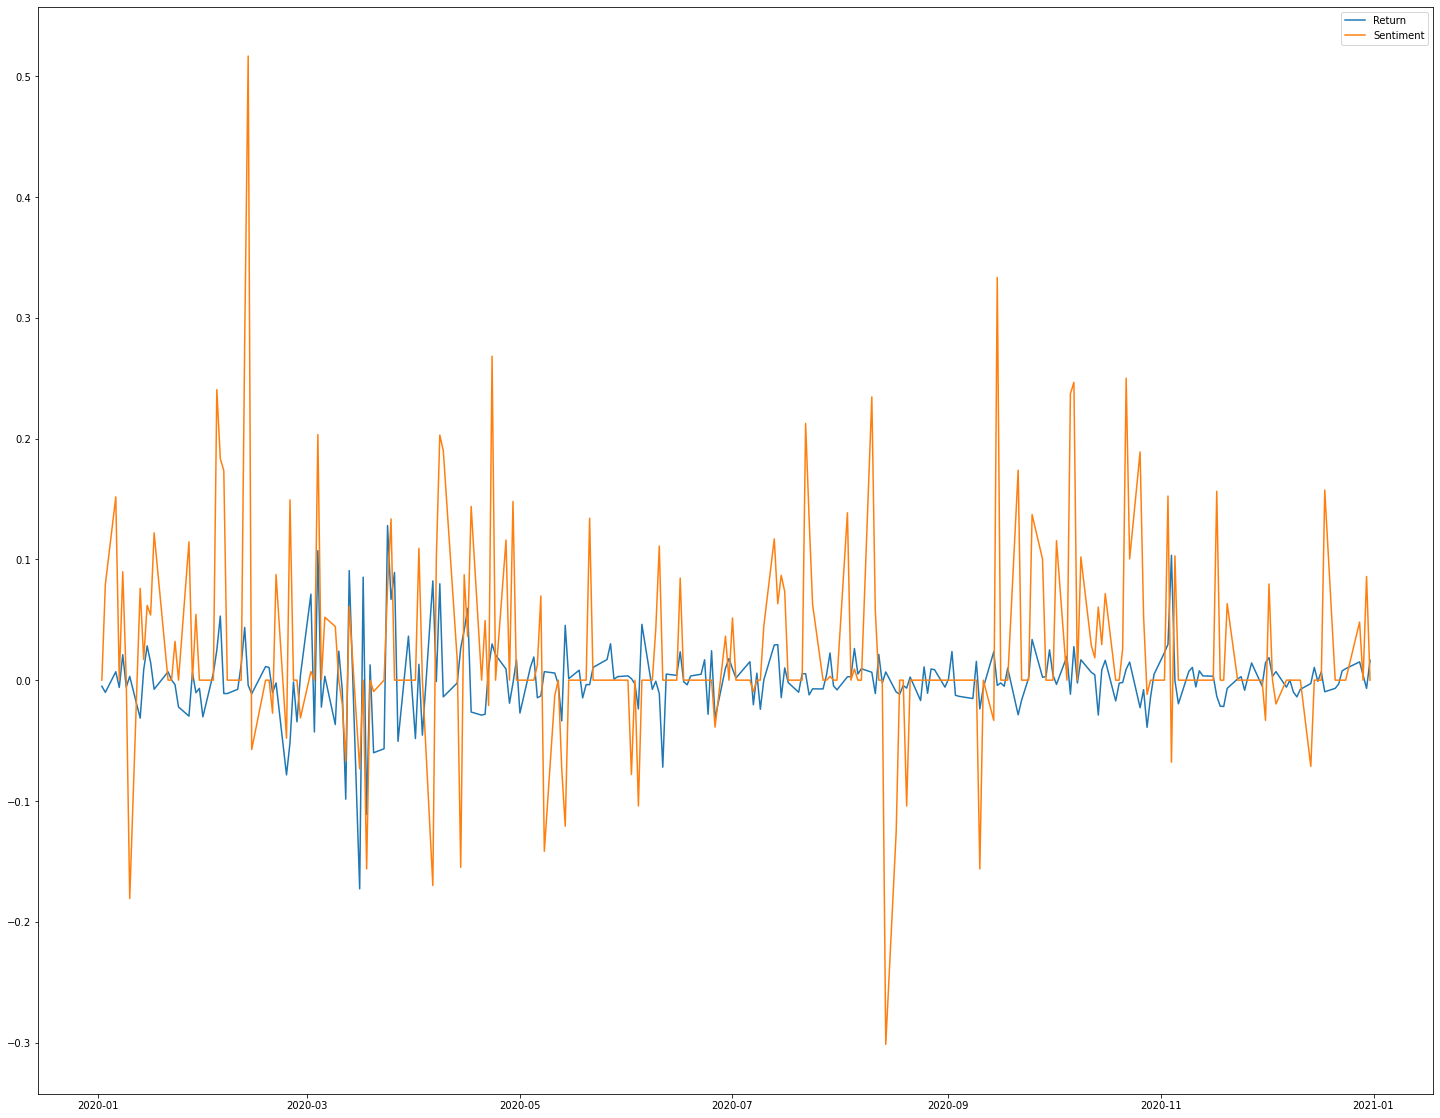

In [190]:
df_UNH= df_merged[df_merged['TICKER']=='UNH']
df_UNH['Sentiment'] = df_UNH['TextBlobTitle']+df_UNH['TextBlobBody']
plt.figure(figsize=(25, 20))
plt.plot(df_UNH['date'], df_UNH['RET'], label = "Return")
plt.plot(df_UNH['date'], df_UNH['Sentiment'], label = "Sentiment")
plt.legend()
plt.show()

In [191]:
num_lag=6
df_merged_copy = df_merged_old.copy().drop(columns=['TextBlobTitle', 'TextBlobBody'])
for i in range(num_lag):
    columnID=[s+str(i+1) for s in ["PRC","VOL","RET","TextBlobTitle","TextBlobBody"]]
    columnID_no_sentiment=[s+str(i+1) for s in ["PRC","VOL","RET"]]
    
    df_merged[columnID]=df_merged_old[["PRC","VOL","RET","TextBlobTitle","TextBlobBody"]].shift(i+1)
    df_merged_copy[columnID_no_sentiment] = df_merged_copy[["PRC","VOL","RET"]].shift(i+1)
    
df_merged_copy.dropna(inplace=True)
df_merged_copy.reset_index(drop=True,inplace=True)

df_merged.dropna(how="any",inplace=True)
df_merged.reset_index(drop=True,inplace=True)
df_merged.head()

,date,TICKER,PRC,VOL,RET,TextBlobTitle,TextBlobBody,PRC1,VOL1,RET1,...,PRC5,VOL5,RET5,TextBlobTitle5,TextBlobBody5,PRC6,VOL6,RET6,TextBlobTitle6,TextBlobBody6
0,2020-01-10,MSFT,161.34000,20709064,-0.004627,0.045455,0.069512,162.09000,21375474.0,0.012493,...,158.62,21099013.0,-0.012452,0.341667,0.310370,160.62,22610236.0,0.018516,0.170833,0.230521
1,2020-01-13,MSFT,163.28000,21611045,0.012024,0.000000,0.030012,161.34000,20709064.0,-0.004627,...,159.03,21156101.0,0.002585,0.000000,0.000000,158.62,21099013.0,-0.012452,0.341667,0.310370
2,2020-01-14,MSFT,162.13000,23469298,-0.007043,0.039205,0.062122,163.28000,21611045.0,0.012024,...,157.58,21844325.0,-0.009118,0.133333,-0.070000,159.03,21156101.0,0.002585,0.000000,0.000000
3,2020-01-15,MSFT,163.17999,21377516,0.006476,0.000000,0.000000,162.13000,23469298.0,-0.007043,...,160.09,27722052.0,0.015928,0.000000,0.012165,157.58,21844325.0,-0.009118,0.133333,-0.070000
4,2020-01-16,MSFT,166.17000,23832244,0.018323,-0.009200,0.037589,163.17999,21377516.0,0.006476,...,162.09,21375474.0,0.012493,-0.014394,-0.011663,160.09,27722052.0,0.015928,0.000000,0.012165


### Pre-modeling Correlation Analysis

In [192]:
df_merged_corr = df_merged.copy()
df_merged_corr['Sentiment'] = df_merged_corr['TextBlobTitle'] + df_merged_corr['TextBlobBody']
df_merged_corr_tick = df_merged_corr[['TICKER', 'PRC', 'VOL', 'RET', 'RET1', 'RET2', 'RET3', 'RET4', 'RET5', 'RET6', 'Sentiment']]
df_merged_corr = df_merged_corr[['PRC', 'VOL', 'RET', 'RET1', 'RET2', 'RET3', 'RET4', 'RET5', 'RET6', 'Sentiment']]

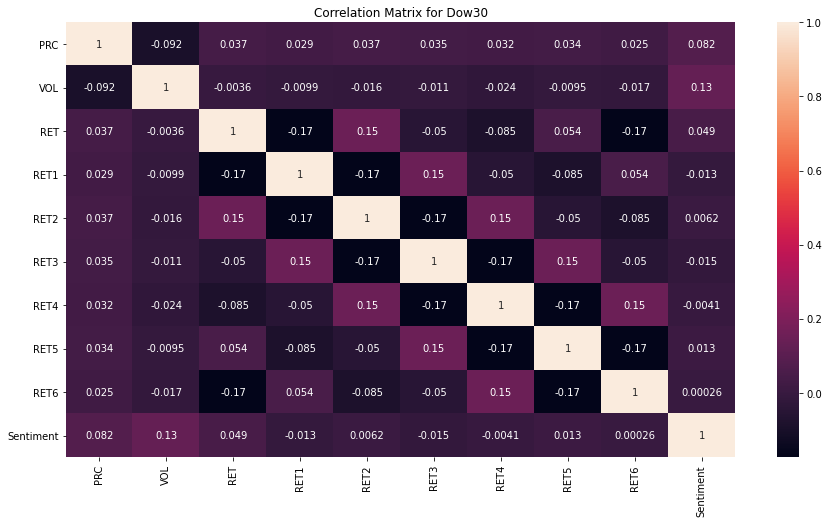

In [193]:
ax = plt.axes()
sns.heatmap(df_merged_corr.corr(), annot = True, ax = ax)
ax.set_title('Correlation Matrix for Dow30')
plt.gcf().set_size_inches(15, 8)

#### Stocks with Highest Correlations between Returns and Sentiment

In [194]:
# We want to look at the stocks with the highest correlations to determine whether there is a difference
# in our models' abilities to predict depending on which stocks are used
stocks = np.sort(df_merged_corr_tick.TICKER.unique()).tolist()
corrs = []
for stock in stocks:
    corrs += [df_merged_corr_tick[(df_merged_corr_tick.TICKER == str(stock))]['RET'].corr(df_merged_corr_tick[df_merged_corr_tick.TICKER == str(stock)].Sentiment)]
df_corr = pd.DataFrame({'Ticker':stocks, 'Correlation':corrs})
df_corr_sorted = df_corr.sort_values(by = 'Correlation', ascending = False).reset_index(drop = True)
df_corr_sorted

,Ticker,Correlation
0,MMM,0.160867
1,UNH,0.159514
2,NKE,0.144597
3,V,0.123807
4,TRV,0.116415
5,JPM,0.113167
6,MSFT,0.111688
7,GS,0.091597
8,AAPL,0.089144
9,CAT,0.056699


In [195]:
df_corr_sorted.Correlation.mean()

0.05445477050208489

In [196]:
# Top 5 best and worst stocks (in terms of their correlation)
corr_best_worst = df_corr_sorted[:5].append(df_corr_sorted[-5:])
corr_best_worst

,Ticker,Correlation
0,MMM,0.160867
1,UNH,0.159514
2,NKE,0.144597
3,V,0.123807
4,TRV,0.116415
26,WBA,-0.009487
27,MRK,-0.013581
28,VZ,-0.044216
29,C,NaN
30,HON,NaN


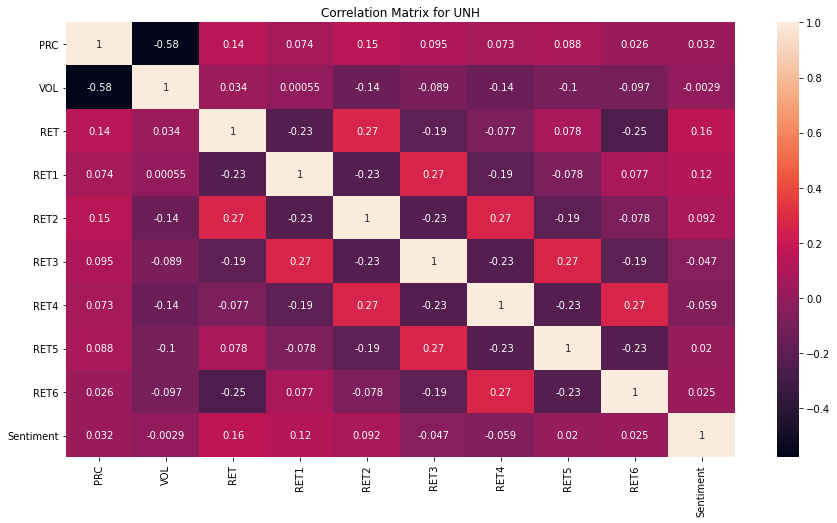

In [197]:
df_UNH = df_merged_corr_tick[df_merged_corr_tick.TICKER == 'UNH']
ax = plt.axes()
sns.heatmap(df_UNH.corr(), annot = True, ax = ax)
ax.set_title('Correlation Matrix for UNH')
plt.gcf().set_size_inches(15, 8)

In [198]:
df_merged.corr()[['TextBlobTitle','TextBlobBody']]

,TextBlobTitle,TextBlobBody
PRC,0.041899,0.103665
VOL,0.086635,0.136489
RET,0.027473,0.056998
TextBlobTitle,1.000000,0.211129
TextBlobBody,0.211129,1.000000
PRC1,0.039705,0.100060
VOL1,0.089046,0.138954
RET1,-0.013635,-0.004421
TextBlobTitle1,0.065009,0.053649
TextBlobBody1,0.055258,0.103954


In [199]:
df_merged_copy.head()

,date,TICKER,PRC,VOL,RET,PRC1,VOL1,RET1,PRC2,VOL2,...,RET3,PRC4,VOL4,RET4,PRC5,VOL5,RET5,PRC6,VOL6,RET6
0,2020-01-10,MSFT,161.34000,20709064,-0.004627,162.09000,21375474.0,0.012493,160.09,27722052.0,...,-0.009118,159.03,21156101.0,0.002585,158.62,21099013.0,-0.012452,160.62,22610236.0,0.018516
1,2020-01-13,MSFT,163.28000,21611045,0.012024,161.34000,20709064.0,-0.004627,162.09,21375474.0,...,0.015928,157.58,21844325.0,-0.009118,159.03,21156101.0,0.002585,158.62,21099013.0,-0.012452
2,2020-01-14,MSFT,162.13000,23469298,-0.007043,163.28000,21611045.0,0.012024,161.34,20709064.0,...,0.012493,160.09,27722052.0,0.015928,157.58,21844325.0,-0.009118,159.03,21156101.0,0.002585
3,2020-01-15,MSFT,163.17999,21377516,0.006476,162.13000,23469298.0,-0.007043,163.28,21611045.0,...,-0.004627,162.09,21375474.0,0.012493,160.09,27722052.0,0.015928,157.58,21844325.0,-0.009118
4,2020-01-16,MSFT,166.17000,23832244,0.018323,163.17999,21377516.0,0.006476,162.13,23469298.0,...,0.012024,161.34,20709064.0,-0.004627,162.09,21375474.0,0.012493,160.09,27722052.0,0.015928


In [15]:
df_merged.to_csv("df_merged.csv", sep="\t", index=False)

In [16]:
#Prediction performances with using sentiment scores

In [200]:
featurename_s=list(df_merged.columns)
featurename_s.remove("date")
featurename_s.remove("TICKER")
featurename_s.remove("PRC")
featurename_s.remove("VOL")
featurename_s.remove("RET")
featurename_s.remove("TextBlobTitle")
featurename_s.remove("TextBlobBody")
targetname_s="RET"
#featurename_s

featurename_ns=list(df_merged_copy.columns)
featurename_ns.remove("date")
featurename_ns.remove("TICKER")
featurename_ns.remove("PRC")
featurename_ns.remove("VOL")
featurename_ns.remove("RET")
targetname_ns='RET'
#featurename_ns

In [201]:
import os
import numpy as np
import random as python_random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
os.environ['PYTHONHASHSEED']=str(2022)
np.random.seed(2022)
python_random.seed(2022)
tf.random.set_seed(2022)

In [202]:
stocklist = np.sort(df_merged.TICKER.unique())
stocklist_list = stocklist.tolist()
stocklist_list.remove('HON')
stocklist_list.remove('C')
stocklist_list

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

In [204]:
df_merged_s.head()

,date,TICKER,PRC,VOL,RET,TextBlobTitle,TextBlobBody,PRC1,VOL1,RET1,...,PRC5,VOL5,RET5,TextBlobTitle5,TextBlobBody5,PRC6,VOL6,RET6,TextBlobTitle6,TextBlobBody6
0,2020-01-10,MSFT,161.34000,20709064,-0.004627,0.045455,0.069512,162.09000,21375474.0,0.012493,...,158.62,21099013.0,-0.012452,0.341667,0.310370,160.62,22610236.0,0.018516,0.170833,0.230521
1,2020-01-13,MSFT,163.28000,21611045,0.012024,0.000000,0.030012,161.34000,20709064.0,-0.004627,...,159.03,21156101.0,0.002585,0.000000,0.000000,158.62,21099013.0,-0.012452,0.341667,0.310370
2,2020-01-14,MSFT,162.13000,23469298,-0.007043,0.039205,0.062122,163.28000,21611045.0,0.012024,...,157.58,21844325.0,-0.009118,0.133333,-0.070000,159.03,21156101.0,0.002585,0.000000,0.000000
3,2020-01-15,MSFT,163.17999,21377516,0.006476,0.000000,0.000000,162.13000,23469298.0,-0.007043,...,160.09,27722052.0,0.015928,0.000000,0.012165,157.58,21844325.0,-0.009118,0.133333,-0.070000
4,2020-01-16,MSFT,166.17000,23832244,0.018323,-0.009200,0.037589,163.17999,21377516.0,0.006476,...,162.09,21375474.0,0.012493,-0.014394,-0.011663,160.09,27722052.0,0.015928,0.000000,0.012165


In [205]:
df_merged_ns.head()

,date,TICKER,PRC,VOL,RET,PRC1,VOL1,RET1,PRC2,VOL2,...,RET3,PRC4,VOL4,RET4,PRC5,VOL5,RET5,PRC6,VOL6,RET6
0,2020-01-10,MSFT,161.34000,20709064,-0.004627,162.09000,21375474.0,0.012493,160.09,27722052.0,...,-0.009118,159.03,21156101.0,0.002585,158.62,21099013.0,-0.012452,160.62,22610236.0,0.018516
1,2020-01-13,MSFT,163.28000,21611045,0.012024,161.34000,20709064.0,-0.004627,162.09,21375474.0,...,0.015928,157.58,21844325.0,-0.009118,159.03,21156101.0,0.002585,158.62,21099013.0,-0.012452
2,2020-01-14,MSFT,162.13000,23469298,-0.007043,163.28000,21611045.0,0.012024,161.34,20709064.0,...,0.012493,160.09,27722052.0,0.015928,157.58,21844325.0,-0.009118,159.03,21156101.0,0.002585
3,2020-01-15,MSFT,163.17999,21377516,0.006476,162.13000,23469298.0,-0.007043,163.28,21611045.0,...,-0.004627,162.09,21375474.0,0.012493,160.09,27722052.0,0.015928,157.58,21844325.0,-0.009118
4,2020-01-16,MSFT,166.17000,23832244,0.018323,163.17999,21377516.0,0.006476,162.13,23469298.0,...,0.012024,161.34,20709064.0,-0.004627,162.09,21375474.0,0.012493,160.09,27722052.0,0.015928


# Fixed parameter results all stocks (No CV)

In [213]:
# make one with sentiment scores and one without
#df_merged = df_merged.loc[df_merged['TICKER'].isin(stocklist)]
df_merged_s = df_merged.loc[df_merged['TICKER'].isin(stocklist)]
df_merged_ns = df_merged_copy.loc[df_merged_copy['TICKER'].isin(stocklist)]

from IPython.display import display, clear_output
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
min_max_scaler = preprocessing.MinMaxScaler()
imputer = SimpleImputer(strategy='mean')

acc_rf = []
acc_xg = []
acc_ad = []
acc_rf_ns = []
acc_xg_ns = []
acc_ad_ns = []


df_master_s = df_merged_s.copy()
df_master_ns = df_merged_ns.copy()

date_all=np.sort(df_merged_s.date.unique())
le = preprocessing.LabelEncoder()

param_list = {  
 'max_depth':[25],       #Candidate for max_depth
 'n_estimators':[1000]  #Candidate for n_estimators
}
param_list_ada = {  
  'n_estimators':[10]  #Candidate for n_estimators
}


for stock in stocklist_list:
    
    df_merged_s = df_master_s[(df_master_s.TICKER == stock)].copy()#select for specific stock sentiment
    df_merged_ns = df_master_ns[(df_master_ns.TICKER == stock)].copy()#select for specific stock without sentiment
    
    teststart=datetime.fromisoformat("2020-10-20").date()

    # Sentiment
    train_x = df_merged_s[df_merged_s.date<teststart].loc[:,featurename_s].copy()
    train_y = df_merged_s[df_merged_s.date<teststart].loc[:,targetname_s].copy()
    train_y=le.fit_transform(train_y>0)
    test_x = df_merged_s[df_merged_s.date>=teststart].loc[:,featurename_s].copy()
    test_y = df_merged_s[df_merged_s.date>=teststart].loc[:,targetname_s].copy()
    test_y=le.transform(test_y>0) 
   

    # No Sentiment
    train_x2 = df_merged_ns[df_merged_ns.date<teststart].loc[:,featurename_ns].copy()
    train_y2 = df_merged_ns[df_merged_ns.date<teststart].loc[:,targetname_ns].copy()
    train_y2 = le.fit_transform(train_y2>0)
    test_x2 = df_merged_ns[df_merged_ns.date>=teststart].loc[:,featurename_ns].copy()
    test_y2 = df_merged_ns[df_merged_ns.date>=teststart].loc[:,targetname_ns].copy()
    test_y2=le.transform(test_y2>0) 

    
    min_max_scaler = preprocessing.MinMaxScaler()
    # Sentiment
    train_x = min_max_scaler.fit_transform(train_x)
    test_x = min_max_scaler.transform(test_x)
    # No sentiment
    train_x2 = min_max_scaler.fit_transform(train_x2)
    test_x2 = min_max_scaler.transform(test_x2)
    
    
    
    
    
    
    # Random Forest with sentiment
    rf = RandomForestClassifier(n_estimators=1000,   #How many trees in total
                            max_depth=25,        #The depth of each tree
                            random_state=2022)
    rf.fit(train_x, train_y)
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalRF_s"]=rf.predict_proba(test_x)[:,1]
    acc_rf.append(accuracy_score(test_y, rf.predict(test_x)))
    
    
    #Random forest without sentiment
    rf2 = RandomForestClassifier(n_estimators=1000,   #How many trees in total
                        max_depth=25,        #The depth of each tree
                        random_state=2022)
    rf2.fit(train_x2, train_y2)
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalRF_ns"]=rf2.predict_proba(test_x2)[:,1]
    acc_rf_ns.append(accuracy_score(test_y2, rf2.predict(test_x2)))
    

    
    
    
    
    
    # XGBoost with sentiment
    xgb=XGBClassifier(n_estimators=1000,    #How many trees in total
          max_depth=25,         #The depth of each tree
          nthread=4,           #Number of threads used in parallel computing
          random_state=2022)
    xgb.fit(train_x, train_y)
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalXG_s"]=xgb.predict_proba(test_x)[:,1]
    acc_xg.append(accuracy_score(test_y,xgb.predict(test_x)))
    
    
    #XGboost without sentiment
    xgb2 = XGBClassifier(n_estimators=1000,    #How many trees in total
      max_depth=25,         #The depth of each tree
      nthread=4,           #Number of threads used in parallel computing
      random_state=2022)
    xgb2.fit(train_x2, train_y2)
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalXG_ns"]=xgb2.predict_proba(test_x2)[:,1]
    acc_xg_ns.append(accuracy_score(test_y2,xgb2.predict(test_x2)))
    
    
    
    
    
    
    #AdaBoost with sentiment
    ad = AdaBoostClassifier(n_estimators=10,  #How many trees in total
                        random_state=2022)
    ad.fit(train_x, train_y)
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalAD_s"]=ad.predict_proba(test_x)[:,1]
    acc_ad.append(accuracy_score(test_y,ad.predict(test_x)))
    
    
    #Adaboost without sentiment
    ad2 = AdaBoostClassifier(n_estimators=10,  #How many trees in total
                    random_state=2022)
    ad2.fit(train_x2, train_y2)
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalAD_ns"]=ad2.predict_proba(test_x2)[:,1]
    acc_ad_ns.append(accuracy_score(test_y2,ad2.predict(test_x2)))
    
    clear_output()
    display(stock)

    
    
print("Random Forest Accuracy (with sentiment scores):")
print(np.mean(acc_rf))
print("XGBoost Accuracy (with sentiment scores):")
print(np.mean(acc_xg))
print("AdaBoost Accuracy (with sentiment scores):")
print(np.mean(acc_ad))

print("Random Forest Accuracy (without sentiment scores):")
print(np.mean(acc_rf_ns))
print("XGBoost Accuracy (without sentiment scores):")
print(np.mean(acc_xg_ns))
print("AdaBoost Accuracy (without sentiment scores):")
print(np.mean(acc_ad_ns))

'WMT'

Random Forest Accuracy (with sentiment scores):
0.5070993914807302
XGBoost Accuracy (with sentiment scores):
0.5165652467883706
AdaBoost Accuracy (with sentiment scores):
0.5057471264367815
Random Forest Accuracy (without sentiment scores):
0.5037187288708587
XGBoost Accuracy (without sentiment scores):
0.504394861392833
AdaBoost Accuracy (without sentiment scores):
0.49898580121703856


In [214]:
df_all_scores_s = pd.DataFrame({'stocks':stocklist_list, 'Random Forest':acc_rf,'XGBoost':acc_xg,'AdaBoost':acc_ad})
df_all_scores_ns = pd.DataFrame({'stocks':stocklist_list, 'Random Forest':acc_rf_ns,'XGBoost':acc_xg_ns,'AdaBoost':acc_ad_ns})

In [221]:
best_fixed = ['AXP','CRM','CVX','INTC','MRK','PG','TRV','VZ']

In [215]:
df_all_scores_s.describe()

,Random Forest,XGBoost,AdaBoost
count,29.000000,29.000000,29.000000
mean,0.507099,0.516565,0.505747
std,0.066849,0.068382,0.059837
min,0.352941,0.352941,0.411765
25%,0.470588,0.509804,0.450980
50%,0.509804,0.529412,0.509804
75%,0.549020,0.568627,0.529412
max,0.647059,0.647059,0.666667


In [216]:
df_all_scores_ns.describe()

,Random Forest,XGBoost,AdaBoost
count,29.000000,29.000000,29.000000
mean,0.503719,0.504395,0.498986
std,0.070328,0.082008,0.079057
min,0.352941,0.274510,0.294118
25%,0.470588,0.490196,0.470588
50%,0.509804,0.509804,0.529412
75%,0.529412,0.549020,0.549020
max,0.627451,0.627451,0.607843


In [222]:
df_all_scores_s[df_all_scores_s.stocks.isin(best_fixed)]

,stocks,Random Forest,XGBoost,AdaBoost
2,AXP,0.647059,0.568627,0.666667
5,CRM,0.588235,0.509804,0.588235
7,CVX,0.549020,0.647059,0.549020
13,INTC,0.470588,0.568627,0.588235
19,MRK,0.509804,0.588235,0.490196
22,PG,0.588235,0.588235,0.490196
23,TRV,0.588235,0.588235,0.431373
26,VZ,0.588235,0.490196,0.509804


In [223]:
df_all_scores_ns[df_all_scores_ns.stocks.isin(best_fixed)]

,stocks,Random Forest,XGBoost,AdaBoost
2,AXP,0.588235,0.568627,0.568627
5,CRM,0.470588,0.490196,0.588235
7,CVX,0.627451,0.607843,0.549020
13,INTC,0.470588,0.529412,0.490196
19,MRK,0.509804,0.509804,0.607843
22,PG,0.607843,0.588235,0.529412
23,TRV,0.549020,0.627451,0.450980
26,VZ,0.627451,0.568627,0.509804


## Models (RF, XGB, ADA) Trained and tested with both Sentiment and Non-sentiment data, cross validation for best parameters testing (ALL STOCK TICKERS)

In [ ]:
# make one with sentiment scores and one without
#df_merged = df_merged.loc[df_merged['TICKER'].isin(stocklist)]
df_merged_s = df_merged.loc[df_merged['TICKER'].isin(stocklist)]
df_merged_ns = df_merged_copy.loc[df_merged_copy['TICKER'].isin(stocklist)]

from IPython.display import display, clear_output
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
min_max_scaler = preprocessing.MinMaxScaler()
imputer = SimpleImputer(strategy='mean')

acc_rf = []
acc_xg = []
acc_ad = []
acc_rf_ns = []
acc_xg_ns = []
acc_ad_ns = []

best_params_rf_s = []
best_params_rf_ns = []
best_params_xgb_s = []
best_params_xgb_ns = []
best_params_ada_s = []
best_params_ada_ns = []

df_master_s = df_merged_s.copy()
df_master_ns = df_merged_ns.copy()

date_all=np.sort(df_merged_s.date.unique())
le = preprocessing.LabelEncoder()

param_list = {  
 'max_depth':[10,25,50,100, 250],       #Candidate for max_depth
 'n_estimators':[100,250,500,1000]  #Candidate for n_estimators
}
param_list_ada = {  
  'n_estimators':[10,50, 100, 250, 500]  #Candidate for n_estimators
}


for stock in stocklist_list:
    
    df_merged_s = df_master_s[(df_master_s.TICKER == stock)].copy()#select for specific stock sentiment
    df_merged_ns = df_master_ns[(df_master_ns.TICKER == stock)].copy()#select for specific stock without sentiment
    
    teststart=datetime.fromisoformat("2020-10-20").date()

    # Sentiment
    train_x = df_merged_s[df_merged_s.date<teststart].loc[:,featurename_s].copy()
    train_y = df_merged_s[df_merged_s.date<teststart].loc[:,targetname_s].copy()
    train_y=le.fit_transform(train_y>0)
    test_x = df_merged_s[df_merged_s.date>=teststart].loc[:,featurename_s].copy()
    test_y = df_merged_s[df_merged_s.date>=teststart].loc[:,targetname_s].copy()
    test_y=le.transform(test_y>0) 
   

    # No Sentiment
    train_x2 = df_merged_ns[df_merged_ns.date<teststart].loc[:,featurename_ns].copy()
    train_y2 = df_merged_ns[df_merged_ns.date<teststart].loc[:,targetname_ns].copy()
    train_y2 = le.fit_transform(train_y2>0)
    test_x2 = df_merged_ns[df_merged_ns.date>=teststart].loc[:,featurename_ns].copy()
    test_y2 = df_merged_ns[df_merged_ns.date>=teststart].loc[:,targetname_ns].copy()
    test_y2=le.transform(test_y2>0) 

    
    min_max_scaler = preprocessing.MinMaxScaler()
    # Sentiment
    train_x = min_max_scaler.fit_transform(train_x)
    test_x = min_max_scaler.transform(test_x)
    # No sentiment
    train_x2 = min_max_scaler.fit_transform(train_x2)
    test_x2 = min_max_scaler.transform(test_x2)
    
    
    
    
    
    # Random Forest with sentiment
    rf = RandomForestClassifier(n_estimators=100,   #How many trees in total
                            max_depth=5,        #The depth of each tree
                            random_state=2022)
    rf = GridSearchCV(estimator = rf, 
                   param_grid = param_list,
                   scoring = 'accuracy',  #The performance metric to select the best parameters.
                   cv=3                   #Number of folds, i.e., K
                  ) 
    rf.fit(train_x, train_y)
    best_params_rf_s+=[rf.best_params_]
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalRF_s"]=rf.predict_proba(test_x)[:,1]
    acc_rf.append(accuracy_score(test_y, rf.predict(test_x)))
    
    
    
    
    
    #Random forest without sentiment
    rf2 = RandomForestClassifier(n_estimators=100,   #How many trees in total
                        max_depth=5,        #The depth of each tree
                        random_state=2022)
#     #rf2 = GridSearchCV(estimator = rf2, 
#                        param_grid = param_list,
#                        scoring = 'accuracy',  #The performance metric to select the best parameters.
#                        cv=10                   #Number of folds, i.e., K
#                       ) 
    rf2.fit(train_x2, train_y2)
    #best_params_rf_ns+=[rf2.best_params_]
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalRF_ns"]=rf2.predict_proba(test_x2)[:,1]
    acc_rf_ns.append(accuracy_score(test_y2, rf2.predict(test_x2)))
    

    
    
    
    # XGBoost with sentiment
    xgb=XGBClassifier(n_estimators=100,    #How many trees in total
          max_depth=2,         #The depth of each tree
          nthread=4,           #Number of threads used in parallel computing
          random_state=2022)
    xgb = GridSearchCV(estimator = xgb, 
                   param_grid = param_list,
                   scoring = 'accuracy',  #The performance metric to select the best parameters.
                   cv=3                   #Number of folds, i.e., K
                  )
    xgb.fit(train_x, train_y)
    best_params_xgb_s+=[xgb.best_params_]
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalXG_s"]=xgb.predict_proba(test_x)[:,1]
    acc_xg.append(accuracy_score(test_y,xgb.predict(test_x)))
    
    
    
    
    
    #XGboost without sentiment
    xgb2 = XGBClassifier(n_estimators=100,    #How many trees in total
      max_depth=2,         #The depth of each tree
      nthread=4,           #Number of threads used in parallel computing
      random_state=2022)
#     #xgb2 = GridSearchCV(estimator = xgb2, 
#                    param_grid = param_list,
#                    scoring = 'accuracy',  #The performance metric to select the best parameters.
#                    cv=10                   #Number of folds, i.e., K
#                   ) 
    xgb2.fit(train_x2, train_y2)
    #best_params_xgb_ns+=[xgb2.best_params_]
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalXG_ns"]=xgb2.predict_proba(test_x2)[:,1]
    acc_xg_ns.append(accuracy_score(test_y2,xgb2.predict(test_x2)))
    
    
    
    
    
    
    
    #AdaBoost with sentiment
    ad = AdaBoostClassifier(n_estimators=10,  #How many trees in total
                        random_state=2022)
    ad = GridSearchCV(estimator = ad, 
                   param_grid = param_list_ada,
                   scoring = 'accuracy',  #The performance metric to select the best parameters.
                   cv=3                   #Number of folds, i.e., K
                  ) 
    ad.fit(train_x, train_y)
    best_params_ada_s+=[ad.best_params_]
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalAD_s"]=ad.predict_proba(test_x)[:,1]
    acc_ad.append(accuracy_score(test_y,ad.predict(test_x)))
    
    
    
    
    
    
    #Adaboost without sentiment
    ad2 = AdaBoostClassifier(n_estimators=10,  #How many trees in total
                    random_state=2022)
#     #ad2 = GridSearchCV(estimator = ad2, 
#                param_grid = param_list_ada,
#                scoring = 'accuracy',  #The performance metric to select the best parameters.
#                cv=10                   #Number of folds, i.e., K
#               ) 
    ad2.fit(train_x2, train_y2)
    #best_params_ada_ns+=[ad2.best_params_]
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalAD_ns"]=ad2.predict_proba(test_x2)[:,1]
    acc_ad_ns.append(accuracy_score(test_y2,ad2.predict(test_x2)))
    
    clear_output()
    display(stock)

    
    
    
print("Random Forest Accuracy (with sentiment scores):")
print(np.mean(acc_rf))
print("XGBoost Accuracy (with sentiment scores):")
print(np.mean(acc_xg))
print("AdaBoost Accuracy (with sentiment scores):")
print(np.mean(acc_ad))

print("Random Forest Accuracy (without sentiment scores):")
print(np.mean(acc_rf_ns))
print("XGBoost Accuracy (without sentiment scores):")
print(np.mean(acc_xg_ns))
print("AdaBoost Accuracy (without sentiment scores):")
print(np.mean(acc_ad_ns))

'AXP'

In [ ]:
df_all_scores_s = pd.DataFrame({'stocks':stocklist_list, 'Random Forest':acc_rf,'XGBoost':acc_xg,'AdaBoost':acc_ad})
df_all_scores_ns = pd.DataFrame({'stocks':stocklist_list, 'Random Forest':acc_rf_ns,'XGBoost':acc_xg_ns,'AdaBoost':acc_ad_ns})

In [ ]:
df_all_scores_s.describe()

In [ ]:
df_all_scores_ns.describe()

In [ ]:
top_scores_s_cv = ['PG','AXP','CVX','BA','CRM','TRV','VZ','JPM']
top_scores_s_cv_df = df_all_scores_s[df_all_scores_s.stocks.isin(top_scores_s_cv)]
top_scores_s_cv_ns_df = df_all_scores_ns[df_all_scores_ns.stocks.isin(top_scores_s_cv)]

In [ ]:
top_scores_s_cv_df

In [ ]:
top_scores_s_cv_ns_df

### Further correlation analysis: correlations of top performing stocks

In [86]:
corr_best_perf = df_corr_sorted[df_corr_sorted.Ticker.isin(top_scores_s_fixed)]
corr_best_perf

,Ticker,Correlation
4,TRV,0.116415
11,CRM,0.054470
14,CVX,0.049820
15,INTC,0.048343
16,AXP,0.041831
19,PG,0.025441
27,MRK,-0.013581
28,VZ,-0.044216


# Cross Validation accuracy scores for top 5 correlated stocks with sentiment

In [ ]:
# make one with sentiment scores and one without
#df_merged = df_merged.loc[df_merged['TICKER'].isin(stocklist)]
df_merged_s = df_merged.loc[df_merged['TICKER'].isin(stocklist)]
df_merged_ns = df_merged_copy.loc[df_merged_copy['TICKER'].isin(stocklist)]

In [168]:
from IPython.display import display, clear_output
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
min_max_scaler = preprocessing.MinMaxScaler()
imputer = SimpleImputer(strategy='mean')

acc_rf = []
acc_xg = []
acc_ad = []
acc_rf_ns = []
acc_xg_ns = []
acc_ad_ns = []

best_params_rf_s = []
best_params_rf_ns = []
best_params_xgb_s = []
best_params_xgb_ns = []
best_params_ada_s = []
best_params_ada_ns = []


date_all=np.sort(df_merged_s.date.unique())
le = preprocessing.LabelEncoder()

param_list = {  
 'max_depth':[10,25,50,100],       #Candidate for max_depth
 'n_estimators':[100,250,500,1000]  #Candidate for n_estimators
}
param_list_ada = {  
  'n_estimators':[10,50,100,500,1000]  #Candidate for n_estimators
}

stocklist2 = ['UNH','MMM','NKE','V','TRV']
for stock in stocklist2:
        
    teststart=datetime.fromisoformat("2020-10-20").date()
    df_merged_s = df_master_s[(df_master_s.TICKER == stock)].copy()#select for specific stock sentiment
    df_merged_ns = df_master_ns[(df_master_ns.TICKER == stock)].copy()#select for specific stock without sentiment

    # Sentiment
    train_x = df_merged_s[df_merged_s.date<teststart].loc[:,featurename_s].copy()
    train_y = df_merged_s[df_merged_s.date<teststart].loc[:,targetname_s].copy()
    train_y=le.fit_transform(train_y>0)
    test_x = df_merged_s[df_merged_s.date>=teststart].loc[:,featurename_s].copy()
    test_y = df_merged_s[df_merged_s.date>=teststart].loc[:,targetname_s].copy()
    test_y=le.transform(test_y>0) 
   

    # No Sentiment
    train_x2 = df_merged_ns[df_merged_ns.date<teststart].loc[:,featurename_ns].copy()
    train_y2 = df_merged_ns[df_merged_ns.date<teststart].loc[:,targetname_ns].copy()
    train_y2 = le.fit_transform(train_y2>0)
    test_x2 = df_merged_ns[df_merged_ns.date>=teststart].loc[:,featurename_ns].copy()
    test_y2 = df_merged_ns[df_merged_ns.date>=teststart].loc[:,targetname_ns].copy()
    test_y2=le.transform(test_y2>0) 

    
    min_max_scaler = preprocessing.MinMaxScaler()
    # Sentiment
    train_x = min_max_scaler.fit_transform(train_x)
    test_x = min_max_scaler.transform(test_x)
    # No sentiment
    train_x2 = min_max_scaler.fit_transform(train_x2)
    test_x2 = min_max_scaler.transform(test_x2)
    
    
    
    
    
    # Random Forest with sentiment
    rf = RandomForestClassifier(n_estimators=100,   #How many trees in total
                            max_depth=5,        #The depth of each tree
                            random_state=2022)
    rf = GridSearchCV(estimator = rf, 
                   param_grid = param_list,
                   scoring = 'accuracy',  #The performance metric to select the best parameters.
                   cv=3                   #Number of folds, i.e., K
                  ) 
    rf.fit(train_x, train_y)
    best_params_rf_s+=[rf.best_params_]
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalRF_s"]=rf.predict_proba(test_x)[:,1]
    acc_rf.append(accuracy_score(test_y, rf.predict(test_x)))
    
    
    
    
    
    #Random forest without sentiment
    rf2 = RandomForestClassifier(n_estimators=100,   #How many trees in total
                        max_depth=5,        #The depth of each tree
                        random_state=2022)
#     #rf2 = GridSearchCV(estimator = rf2, 
#                        param_grid = param_list,
#                        scoring = 'accuracy',  #The performance metric to select the best parameters.
#                        cv=10                   #Number of folds, i.e., K
#                       ) 
    rf2.fit(train_x2, train_y2)
    #best_params_rf_ns+=[rf2.best_params_]
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalRF_ns"]=rf2.predict_proba(test_x2)[:,1]
    acc_rf_ns.append(accuracy_score(test_y2, rf2.predict(test_x2)))
    

    
    
    
    # XGBoost with sentiment
    xgb=XGBClassifier(n_estimators=100,    #How many trees in total
          max_depth=2,         #The depth of each tree
          nthread=4,           #Number of threads used in parallel computing
          random_state=2022)
    xgb = GridSearchCV(estimator = xgb, 
                   param_grid = param_list,
                   scoring = 'accuracy',  #The performance metric to select the best parameters.
                   cv=3                   #Number of folds, i.e., K
                  )
    xgb.fit(train_x, train_y)
    best_params_xgb_s+=[xgb.best_params_]
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalXG_s"]=xgb.predict_proba(test_x)[:,1]
    acc_xg.append(accuracy_score(test_y,xgb.predict(test_x)))
    
    
    
    
    
    #XGboost without sentiment
    xgb2 = XGBClassifier(n_estimators=100,    #How many trees in total
      max_depth=2,         #The depth of each tree
      nthread=4,           #Number of threads used in parallel computing
      random_state=2022)
#     #xgb2 = GridSearchCV(estimator = xgb2, 
#                    param_grid = param_list,
#                    scoring = 'accuracy',  #The performance metric to select the best parameters.
#                    cv=10                   #Number of folds, i.e., K
#                   ) 
    xgb2.fit(train_x2, train_y2)
    #best_params_xgb_ns+=[xgb2.best_params_]
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalXG_ns"]=xgb2.predict_proba(test_x2)[:,1]
    acc_xg_ns.append(accuracy_score(test_y2,xgb2.predict(test_x2)))
    
    
    
    
    
    
    
    #AdaBoost with sentiment
    ad = AdaBoostClassifier(n_estimators=10,  #How many trees in total
                        random_state=2022)
    ad = GridSearchCV(estimator = ad, 
                   param_grid = param_list_ada,
                   scoring = 'accuracy',  #The performance metric to select the best parameters.
                   cv=3                   #Number of folds, i.e., K
                  ) 
    ad.fit(train_x, train_y)
    best_params_ada_s+=[ad.best_params_]
    df_merged_s.loc[df_merged_s.date>=teststart,"SignalAD_s"]=ad.predict_proba(test_x)[:,1]
    acc_ad.append(accuracy_score(test_y,ad.predict(test_x)))
    
    
    
    
    
    
    #Adaboost without sentiment
    ad2 = AdaBoostClassifier(n_estimators=100,  #How many trees in total
                    random_state=2022)
#     #ad2 = GridSearchCV(estimator = ad2, 
#                param_grid = param_list_ada,
#                scoring = 'accuracy',  #The performance metric to select the best parameters.
#                cv=10                   #Number of folds, i.e., K
#               ) 
    ad2.fit(train_x2, train_y2)
    #best_params_ada_ns+=[ad2.best_params_]
    df_merged_ns.loc[df_merged_ns.date>=teststart,"SignalAD_ns"]=ad2.predict_proba(test_x2)[:,1]
    acc_ad_ns.append(accuracy_score(test_y2,ad2.predict(test_x2)))
    
    clear_output()
    display(stock)

    
    
    
print("Random Forest Accuracy (with sentiment scores):")
print(np.mean(acc_rf))
print("XGBoost Accuracy (with sentiment scores):")
print(np.mean(acc_xg))
print("AdaBoost Accuracy (with sentiment scores):")
print(np.mean(acc_ad))

print("Random Forest Accuracy (without sentiment scores):")
print(np.mean(acc_rf_ns))
print("XGBoost Accuracy (without sentiment scores):")
print(np.mean(acc_xg_ns))
print("AdaBoost Accuracy (without sentiment scores):")
print(np.mean(acc_ad_ns))

'TRV'

Random Forest Accuracy (with sentiment scores):
0.4862745098039216
XGBoost Accuracy (with sentiment scores):
0.5254901960784314
AdaBoost Accuracy (with sentiment scores):
0.4980392156862745
Random Forest Accuracy (without sentiment scores):
0.4666666666666667
XGBoost Accuracy (without sentiment scores):
0.5058823529411766
AdaBoost Accuracy (without sentiment scores):
0.5215686274509803


In [169]:
df_most_correlated_scores = pd.DataFrame({'stocks':stocklist2, 'Random Forest':acc_rf,'XGBoost':acc_xg,'AdaBoost':acc_ad})

In [170]:
df_most_correlated_scores

,stocks,Random Forest,XGBoost,AdaBoost
0,UNH,0.431373,0.490196,0.470588
1,MMM,0.529412,0.490196,0.470588
2,NKE,0.450980,0.490196,0.470588
3,V,0.450980,0.568627,0.549020
4,TRV,0.568627,0.588235,0.529412
